In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, StandardScaler
import seaborn as sns
import scipy.stats as stats

In [2]:
# Create a custom dataset
data = {
    'Student_ID': [101, 102, 103, 104, 105,106,107],
    'Name': ['Prachi', 'Akshat', 'Gaurang','Atharva', 'Srushti','Rahul','Ajay'],
    'Maths_Score': [85, 78, np.nan, 92, 88,np.nan,50],
    'Science_Score': [90, 82, 79, np.nan, 91,60,np.nan],
    'English_Score': [88, 85, 84, 89, np.nan,80,56],
    'Attendance': [92, np.nan, 85, 90, 87,np.nan,96],
    'Gender': ['Female', 'Male', 'Male', 'Male', 'Female','Male','Male']
}

df = pd.DataFrame(data)
print("Dataset:")
df

Dataset:


,Student_ID,Name,Maths_Score,Science_Score,English_Score,Attendance,Gender
0,101,Prachi,85.0,90.0,88.0,92.0,Female
1,102,Akshat,78.0,82.0,85.0,NaN,Male
2,103,Gaurang,NaN,79.0,84.0,85.0,Male
3,104,Atharva,92.0,NaN,89.0,90.0,Male
4,105,Srushti,88.0,91.0,NaN,87.0,Female
5,106,Rahul,NaN,60.0,80.0,NaN,Male
6,107,Ajay,50.0,NaN,56.0,96.0,Male


In [3]:
df.describe()

,Student_ID,Maths_Score,Science_Score,English_Score,Attendance
count,7.000000,5.0000,5.000,6.000000,5.000000
mean,104.000000,78.6000,80.400,80.333333,90.000000
std,2.160247,16.7869,12.502,12.339638,4.301163
min,101.000000,50.0000,60.000,56.000000,85.000000
25%,102.500000,78.0000,79.000,81.000000,87.000000
50%,104.000000,85.0000,82.000,84.500000,90.000000
75%,105.500000,88.0000,90.000,87.250000,92.000000
max,107.000000,92.0000,91.000,89.000000,96.000000


In [4]:
df.dtypes

Student_ID         int64
Name              object
Maths_Score      float64
Science_Score    float64
English_Score    float64
Attendance       float64
Gender            object
dtype: object

In [5]:
df.isnull().sum()

Student_ID       0
Name             0
Maths_Score      2
Science_Score    2
English_Score    1
Attendance       2
Gender           0
dtype: int64

In [6]:
# Fill numerical columns with their mean
for col in ['Maths_Score', 'Science_Score', 'English_Score', 'Attendance']:
    df[col].fillna(df[col].mean(), inplace=True)

print("\nAfter Handling Missing Values:")
df


After Handling Missing Values:


C:\Users\Ayaan\AppData\Local\Temp\ipykernel_20724\3979164383.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


,Student_ID,Name,Maths_Score,Science_Score,English_Score,Attendance,Gender
0,101,Prachi,85.0,90.0,88.000000,92.0,Female
1,102,Akshat,78.0,82.0,85.000000,90.0,Male
2,103,Gaurang,78.6,79.0,84.000000,85.0,Male
3,104,Atharva,92.0,80.4,89.000000,90.0,Male
4,105,Srushti,88.0,91.0,80.333333,87.0,Female
5,106,Rahul,78.6,60.0,80.000000,90.0,Male
6,107,Ajay,50.0,80.4,56.000000,96.0,Male


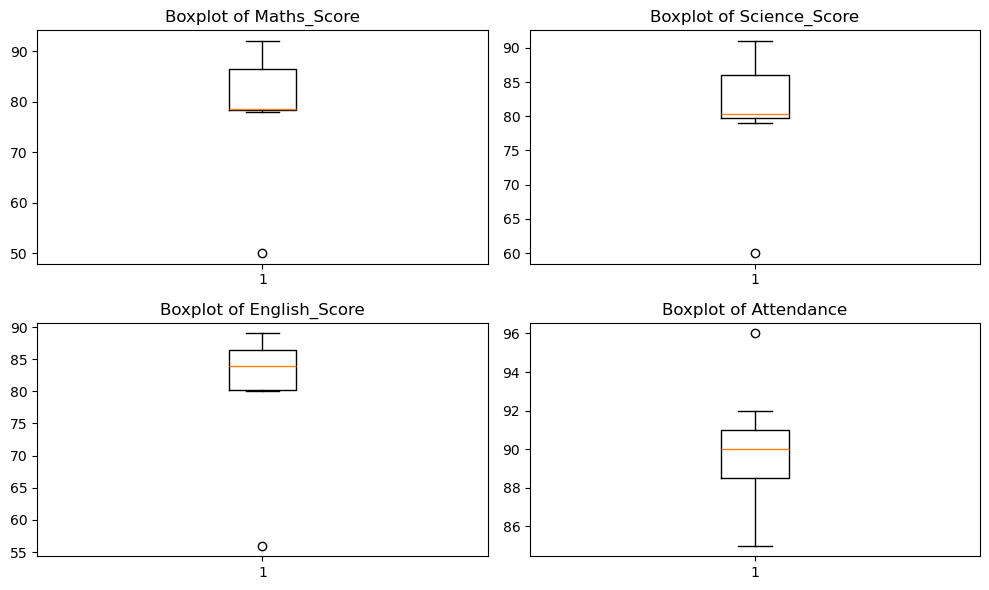

In [7]:
# Plot boxplots for numerical columns
numerical_cols = ['Maths_Score', 'Science_Score', 'English_Score', 'Attendance']

plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()


In [8]:
# Remove outliers based on IQR
for col in numerical_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("\nAfter Removing Outliers:")
df



After Removing Outliers:


,Student_ID,Name,Maths_Score,Science_Score,English_Score,Attendance,Gender
0,101,Prachi,85.0,90.0,88.000000,92.0,Female
1,102,Akshat,78.0,82.0,85.000000,90.0,Male
2,103,Gaurang,78.6,79.0,84.000000,85.0,Male
3,104,Atharva,92.0,80.4,89.000000,90.0,Male
4,105,Srushti,88.0,91.0,80.333333,87.0,Female


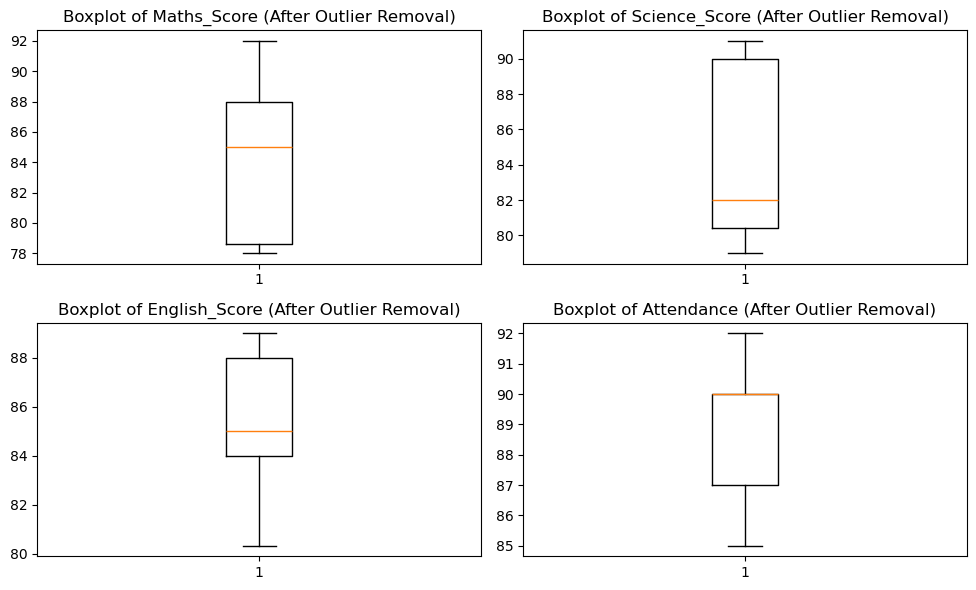

In [9]:
# Plot boxplots for numerical columns after outlier removal
plt.figure(figsize=(10, 6))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 2, i)
    plt.boxplot(df[col])
    plt.title(f"Boxplot of {col} (After Outlier Removal)")
plt.tight_layout()
plt.show()


In [10]:
# Normalize numerical columns using MinMaxScaler
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[numerical_cols] = scaler.fit_transform(df_scaled[numerical_cols])

print("\nAfter Scaling (Normalization):")
df_scaled



After Scaling (Normalization):


,Student_ID,Name,Maths_Score,Science_Score,English_Score,Attendance,Gender
0,101,Prachi,0.500000,0.916667,0.884615,1.000000,Female
1,102,Akshat,0.000000,0.250000,0.538462,0.714286,Male
2,103,Gaurang,0.042857,0.000000,0.423077,0.000000,Male
3,104,Atharva,1.000000,0.116667,1.000000,0.714286,Male
4,105,Srushti,0.714286,1.000000,0.000000,0.285714,Female


<Axes: xlabel='Maths_Score', ylabel='Density'>

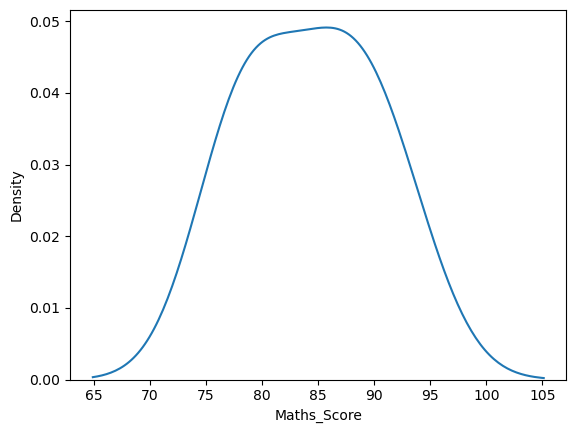

In [11]:
sns.kdeplot(df['Maths_Score'])

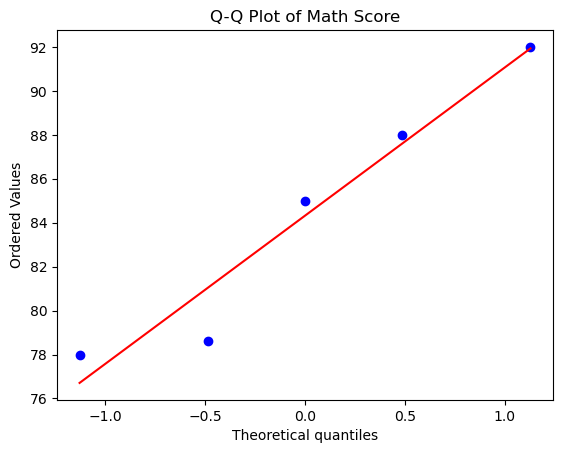

In [21]:
# Q-Q Plot
stats.probplot(df['Maths_Score'], dist="norm",plot=plt)
plt.title("Q-Q Plot of Math Score")
plt.show()